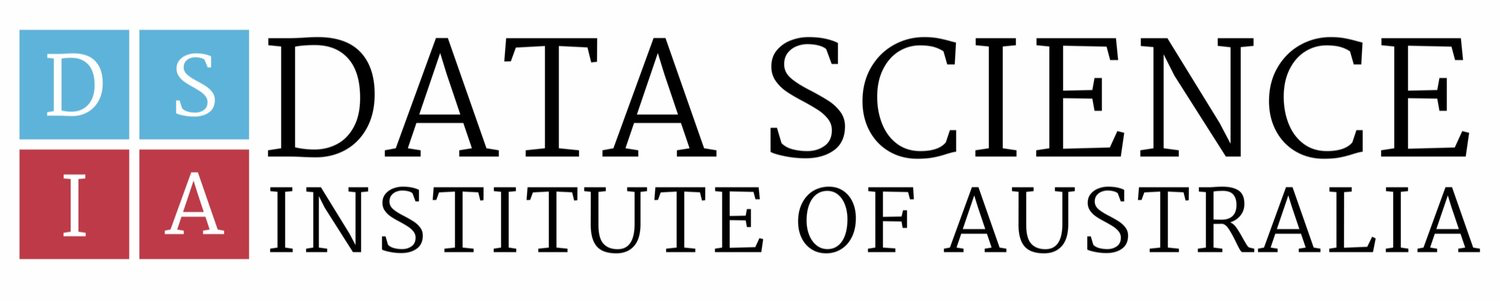

# Data Science and AI
## Lab 5.1: Logistic Regression
### Predicting Survival on the Titanic
The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
%matplotlib inline

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score

Load the `titanic_train.csv` file into a DataFrame named 'titanic', with index column=`PassengerId`. Display the head of the DataFrame.

In [2]:
# insert code here
titanic = pd.read_csv('titanic_train.csv',index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question
- Why would we want to set an index column based on `PassengerId`?

### Answer
- We need to set a predictor variable to train and test any model.

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
# insert code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Numerical Predictors Only
To begin, let's try a model based on the passenger class and parents/children features:

In [5]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

Partition the data into training and testing subsets:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [7]:
logreg = LogisticRegression(solver='lbfgs')

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [8]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The computed coefficients are an array stored in the 1st element of an array:

In [9]:
logreg.coef_[0]

array([-0.87239066,  0.337888  ])

The computed intercept is the 1st element of another array:

In [10]:
logreg.intercept_[0]

1.3043028200166595

We can create tuples of the predictor names and coefficients like this:

In [11]:
print(set(zip(feature_cols, logreg.coef_[0])))

{('Parch', 0.3378880048779746), ('Pclass', -0.8723906606017781)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [12]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('%-10s: %9.6f' % (col[0], col[1]))

Pclass    : -0.872391
Parch     :  0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [13]:
y_pred_class = logreg.predict(X_train)
from sklearn import metrics
print('accuracy = %.4f' % metrics.accuracy_score(y_train, y_pred_class))

accuracy = 0.6901


What is the `accuracy_score` for the test data?

In [14]:
# insert code here
y_pred_class = logreg.predict(X_test)
print('accuracy = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy = 0.6682


### Question
- What can we say aout this result?

### Answer
- Train and test are around the same value. 
- These might be a good train and test set to explore.

Let's include `Age` in the model. As we know from a previous lab, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [15]:
titanic['Age_no_NA'] = titanic['Age'].copy()
titanic['Age_no_NA'].fillna(titanic['Age_no_NA'].mean(), inplace=True)

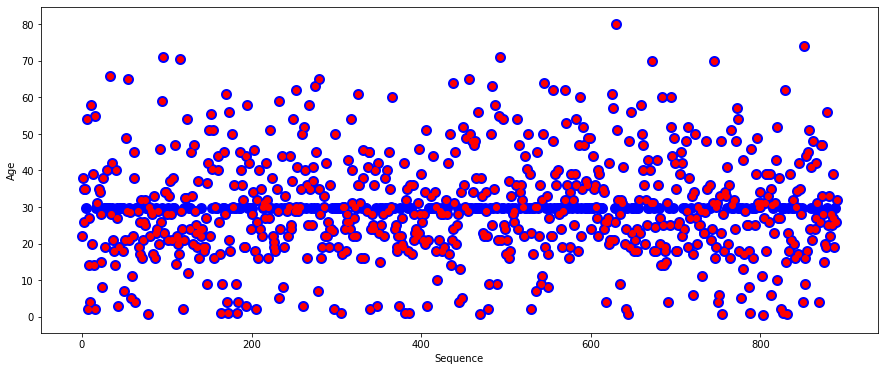

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(range(titanic.shape[0]), titanic['Age_no_NA'], c='b', lw=5)
plt.scatter(range(titanic.shape[0]), titanic['Age'], c='r', lw=1)
plt.xlabel('Sequence')
plt.ylabel('Age')
plt.show()

In [17]:
feature_cols = ['Pclass', 'Parch', 'Age_no_NA']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1)
logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_train)
print('accuracy (train)= %.4f' %
      accuracy_score(y_train, y_pred_class))

y_pred_class = logreg.predict(X_test)
print('accuracy (test) = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy (train)= 0.7171
accuracy (test) = 0.6726


### Question
- So, including age did little to reduce the variance in our model. Why might this be?

### Answer
- Test set increase although minimal
- We can still proceed with these test and train sets

Let's see where the model is going wrong by showing the **Confusion Matrix**:

In [18]:
prds = logreg.predict(X)
print(confusion_matrix(y_test, y_pred_class))

[[107  21]
 [ 52  43]]


Nb. Here is how `confusion_matrix` arranges its output:

In [19]:
df = pd.DataFrame({'Actual': y_test,
                   'Predict': y_pred_class})
df['Predict'][df['Actual'] == 0].sum()

21

In [20]:
# FN = Survived - (Predict_survived)
df[df['Actual'] == 1].shape[0] - df['Predict'][df['Actual'] == 1].sum()

52

In [21]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [22]:
print('        Actual')
print('Predict TP FN')
print('        FP TN')

        Actual
Predict TP FN
        FP TN


### Question
- Which type of error is more prevalent?

### Answer
- ?

Maybe we are not using the right cut-off value.

By default, we are predicting that `Survival` is True if the probability >= _0.5_, but we could use a different threshold.

The **ROC** curve helps us decide (as well as showing us how good our predictive model really is):

In [23]:
logreg.predict_proba(X_test)[:10, 1]

array([0.52253808, 0.19299363, 0.52562116, 0.19299363, 0.72392492,
       0.2454567 , 0.48016507, 0.63413911, 0.68946101, 0.19299363])

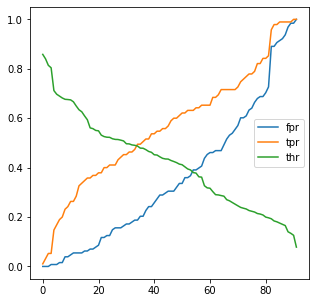

In [24]:
# Generate the prediction values for each of the test observations
# using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:, 1]

# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(range(len(thr)-1), fpr[1:], label='fpr')
plt.plot(range(len(thr)-1), tpr[1:], label='tpr')
plt.plot(range(len(thr)-1), thr[1:], label='thr')
plt.legend()
plt.show()

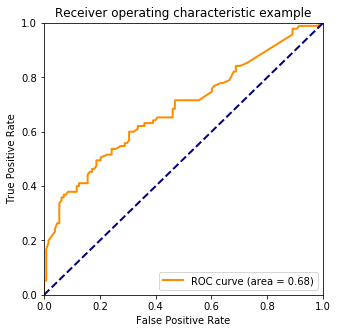

In [25]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

### Including Categorical Predictors
So far, we have only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [26]:
titanic_with_dummies = pd.get_dummies(data=titanic,
                                      columns=['Sex', 'Embarked', 'Pclass'])
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_no_NA,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,22.0,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,38.0,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,26.0,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,35.0,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,35.0,0,1,0,0,1,0,0,1


In [27]:
titanic_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
Survived      891 non-null int64
Name          891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Age_no_NA     891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
dtypes: float64(3), int64(3), object(3), uint8(8)
memory usage: 76.6+ KB


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [28]:
cols = ['Age', 'Parch', 'Sex_male', 'Pclass_1', 'Pclass_2']
gby = ['Parch', 'Sex_male', 'Pclass_1', 'Pclass_2']
titanic_with_dummies['Age'] = titanic_with_dummies[cols] \
    .groupby(gby)['Age'] \
    .transform(lambda x: x.fillna(x.mean()))

Compare the `Age` column between the old and new imputation methods:

In [29]:
print(titanic[['Age', 'Age_no_NA']].describe())
print()

              Age   Age_no_NA
count  714.000000  891.000000
mean    29.699118   29.699118
std     14.526497   13.002015
min      0.420000    0.420000
25%     20.125000   22.000000
50%     28.000000   29.699118
75%     38.000000   35.000000
max     80.000000   80.000000



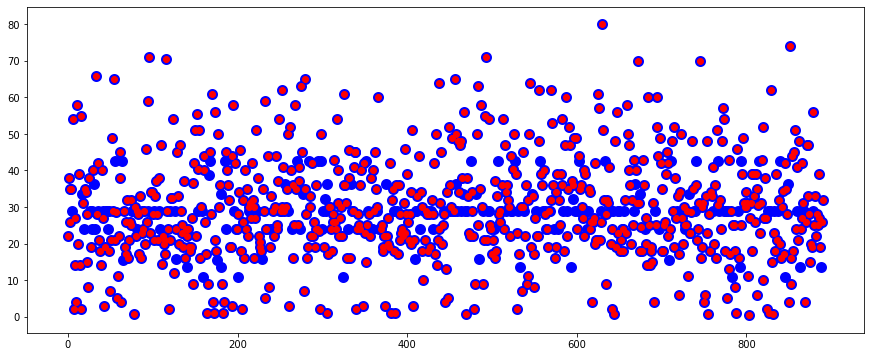

In [30]:
plt.figure(figsize=(15, 6))
plt.scatter(range(titanic.shape[0]), titanic_with_dummies['Age'], c='b', lw=5)
plt.scatter(range(titanic.shape[0]), titanic['Age'], c='r', lw=1)
plt.show()

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [31]:
feature_cols = ['Parch', 'Sex_male', 'Sex_female', 'Pclass_1',
                'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1)

logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_train)
print('accuracy (train)= %.4f' %
      accuracy_score(y_train, y_pred_class))

y_pred_class = logreg.predict(X_test)
# Print the new accuracy rate
print('accuracy (test) = %.4f' %
       accuracy_score(y_test, y_pred_class))

accuracy (train)= 0.8144
accuracy (test) = 0.8117


Plot the ROC curve for the new model:

In [32]:
# insert code here
# Generate the prediction values for each of the test observations
# using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:, 1]

# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

Can we improve the model by including the remaining features?

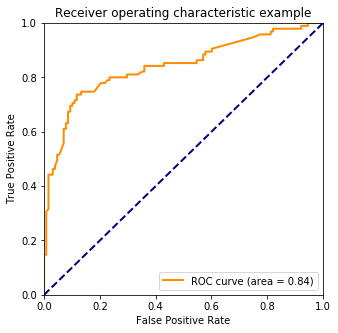

In [33]:
# insert code here
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

In [37]:
feature_cols = ['Parch', 'Sex_male', 'Sex_female',
                'Pclass_1', 'Pclass_2', 'Pclass_3',
                'Age', 'SibSp', 'Fare',
                'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies.Survived

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1)

logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_train)
print('accuracy (train)= %.4f' %
      accuracy_score(y_train, y_pred_class))

y_pred_class = logreg.predict(X_test)
# Print the new accuracy rate
print('accuracy (test) = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy (train)= 0.8174
accuracy (test) = 0.8072


### Demographics of Survival
#### Actual survival

In [41]:
ttwd = titanic_with_dummies
print('Male survival  : %.2f%% of %3d' % (
    100 * ttwd[ttwd['Sex_male'] == 1].Survived.mean(),
    ttwd['Sex_male'].sum()))

print('Female survival: %.2f%% of %3d' % (
    100 * ttwd[ttwd['Sex_female'] == 1].Survived.mean(),
    ttwd['Sex_female'].sum()))

print('Child survival : %.2f%% of %3d' % (
    100 * ttwd[ttwd['Age'] < 16].Survived.mean(),
    len(ttwd[ttwd['Age'] < 16])))

Male survival  : 18.89% of 577
Female survival: 74.20% of 314
Child survival : 51.96% of 102


#### Predicted survival

In [42]:
# Make a data frame of results, including actual and predicted response:
y_hat = logreg.predict(X)
y_hats = pd.Series(y_hat, index=X.index)
y_hatdf = pd.DataFrame({'y_hat': y_hats})
y_actuals = pd.Series(y, index=X.index)
y_actualdf = pd.DataFrame({'y_actual': y_actuals})
ttall = y_hatdf.join(y_actualdf).join(X)
ttall.head()

,y_hat,y_actual,Parch,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,22.0,1,7.2500,0,0,1
2,1,1,0,0,1,1,0,0,38.0,1,71.2833,1,0,0
3,1,1,0,0,1,0,0,1,26.0,0,7.9250,0,0,1
4,1,1,0,0,1,1,0,0,35.0,1,53.1000,0,0,1
5,0,0,0,1,0,0,0,1,35.0,0,8.0500,0,0,1


In [45]:
#Unsure how to fix it.
print('Male survival  : %5.2f%% of %3d' % (
    100 * ttall[ttall['Sex_male'] == 1].y_hat.mean(),ttwd['Sex_male'].sum()))

print('Female survival: %5.2f%% of %3d' % (
    100 * ttall[ttall['Sex_female'] == 1].y_hat.mean(),ttwd['Sex_female'].sum()))

print('Child survival : %5.2f%% of %3d' % (
    100 * ttall[ttall['Age'] < 16].y_hat.mean(),len(ttall[ttall['Age'] < 16]))

SyntaxError: unexpected EOF while parsing (<ipython-input-45-182b94a999c1>, line 9)

### Question:
- So, for some reason, this model substantially under-predicts male survival and over-predicts female survival, but does quite well on child survival. Why might this be? 

### Answer
- ?

## Homework
1. Remove the `random_state` parameter, so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?
2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?
3. Look at the `FPR` & `TPR` vectors for the best model. Assuming the goal was to minimise overall prediction error in the combined dataset, how would you choose the best probability cut-off value for correct prediction?